# Ressources Intéressantes 


https://seaborn.pydata.org/tutorial/introduction.html (tout le tutoriel mais surtout les 2 premières)

https://elitedatascience.com/python-seaborn-tutorial

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdate
import pandas as pd
import numpy as np

link = "../CSV/weather2019.csv"
df = pd.read_csv(link)
df['DATE'] = pd.to_datetime(df['DATE'])

In [3]:
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## Basic Scatterplot

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

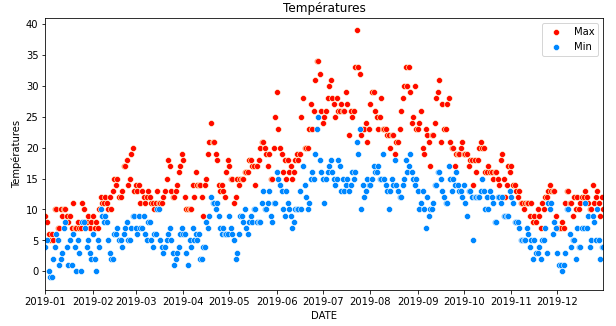


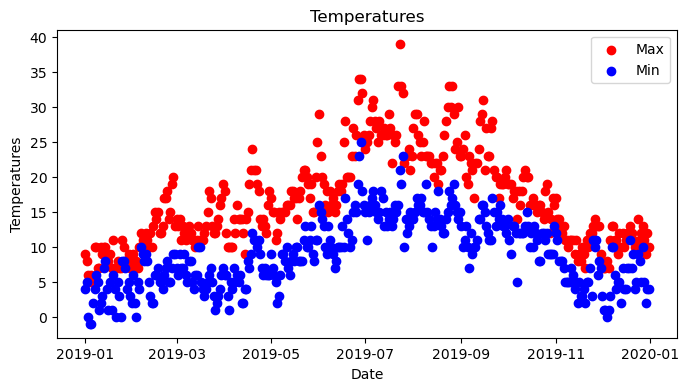

In [15]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

plt.figure(figsize=(8, 4))
plt.scatter(df['DATE'], df['MAX_TEMPERATURE_C'], color='red', label='Max')
plt.scatter(df['DATE'], df['MIN_TEMPERATURE_C'], color='blue', label='Min')

plt.title('Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperatures')
plt.legend()

plt.show()


## The hue argument

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

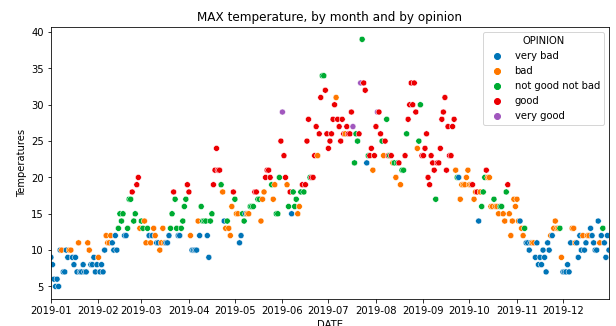

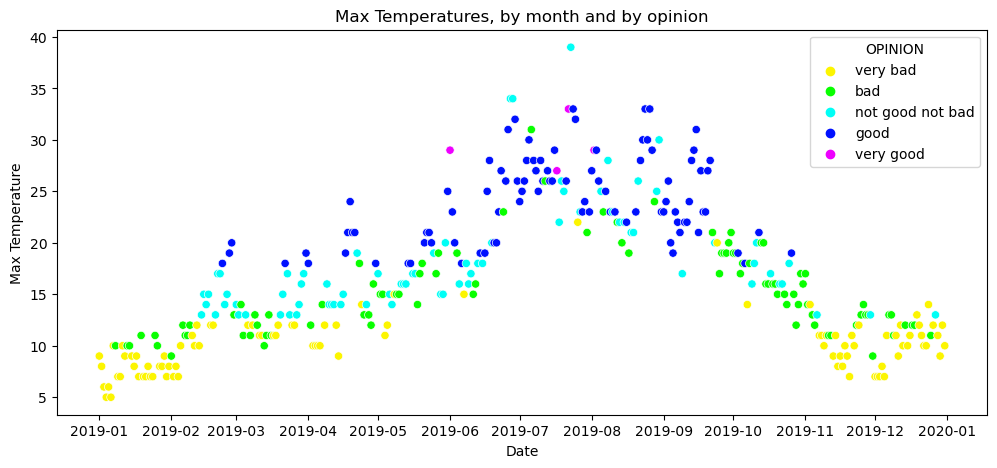

In [75]:
# Of course, you'll add legend, readable axis ticks, and title (there is no seaborn function for that, use matplotlib syntax)
# It's up to you:

unique_opinions = df['OPINION'].unique()
df['DATE'] = pd.to_datetime(df['DATE'])

color_palette = sns.color_palette("hsv", n_colors=len(unique_opinions))

plt.figure(figsize=(12, 5))

sns.scatterplot(data=df, x='DATE', y='MAX_TEMPERATURE_C', hue='OPINION', palette=color_palette)

plt.title('Max Temperatures, by month and by opinion')
plt.xlabel('Date')
plt.ylabel('Max Temperature')

# Créer un objet MonthLocator pour afficher les années et les mois
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.legend(title='OPINION')

plt.show()


## Représenter une distribution

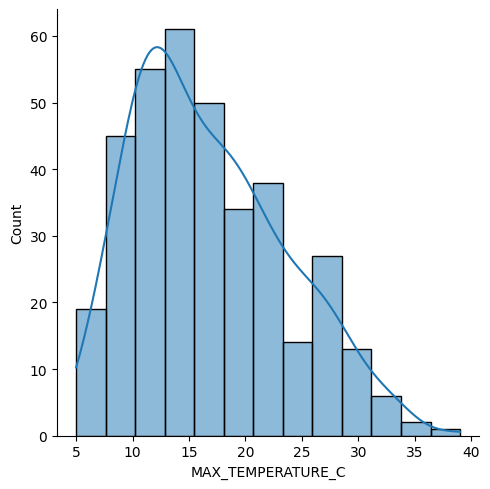

In [10]:
sns.displot(data=df, x="MAX_TEMPERATURE_C", kde=True)


**Plot plusieurs distributions par catégorie :**

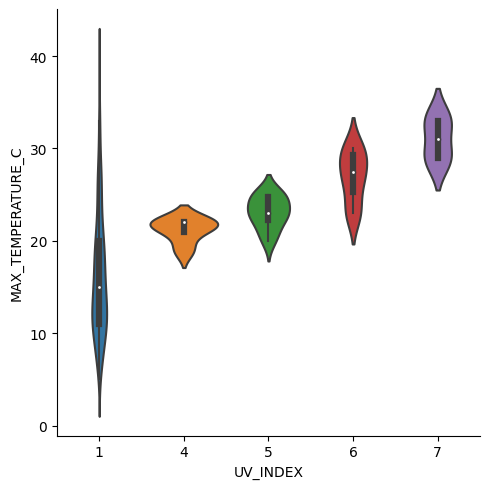

In [17]:
sns.catplot(data=df, kind="violin", x = "UV_INDEX", y = "MAX_TEMPERATURE_C")


## Correlation coefficient and heatmap

For more information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/





What does it mean ? Could you interpret this ? Why the diagonal value is `1` ? And why there is a blank column and a blank row ?

Could you find the less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (`cmap`) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html and `center` it on 0.

Other ressource : https://matplotlib.org/stable/tutorials/colors/colormaps.html 


Here is an example of what is expected (but you can improve colors) :

![ ](https://storage.googleapis.com/quest_editor_uploads/Ci9AZJdBsnuTx7z8XuZRTbvoCi3uON5r.png)


Then, please add a title of course.

Try to interpret it : which columns are most correlated with MAX Temperature ? Positively and negatively ? Do you think it's logical ?

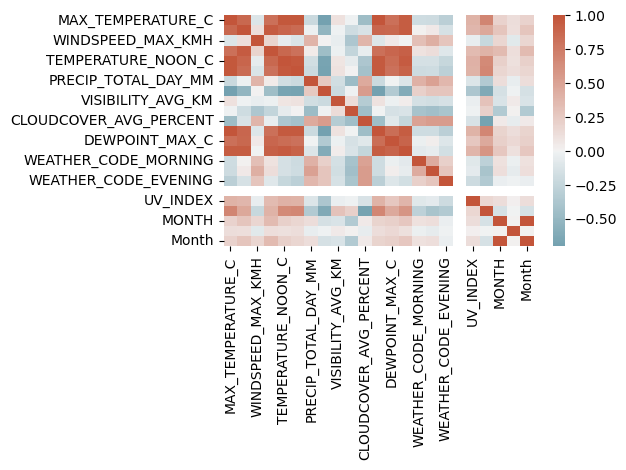

In [42]:
# It's your turn now :

numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, cmap=cmap, center=0)

plt.show()

## Linear regression

With `regplot`, you can plot a regresion line. It's very simple, but here, it's not very adapted, because our 2 columns seems not correlated. But you know lots of correlated columns with MAX Temperature.
Replace the X-axis with a positively correlated columns, then plot another regplot with a negative correlation.

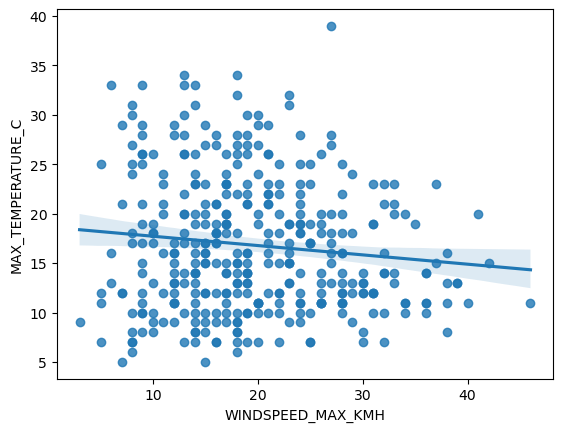

In [43]:

sns.regplot(y='MAX_TEMPERATURE_C', x='WINDSPEED_MAX_KMH', data = df)
plt.show()

In [49]:
df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,Month
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,116,143,176,0,1,5.1,very bad,1,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,119,116,116,0,1,8.7,very bad,1,2,1
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,116,116,116,0,1,8.7,very bad,1,3,1
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,116,116,122,0,1,5.1,very bad,1,4,1
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,143,116,116,0,1,8.7,very bad,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,119,143,116,0,1,8.7,not good not bad,12,27,12
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,143,116,116,0,1,6.9,very bad,12,28,12
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,116,116,116,0,1,8.7,very bad,12,29,12
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,113,113,113,0,1,8.7,very bad,12,30,12


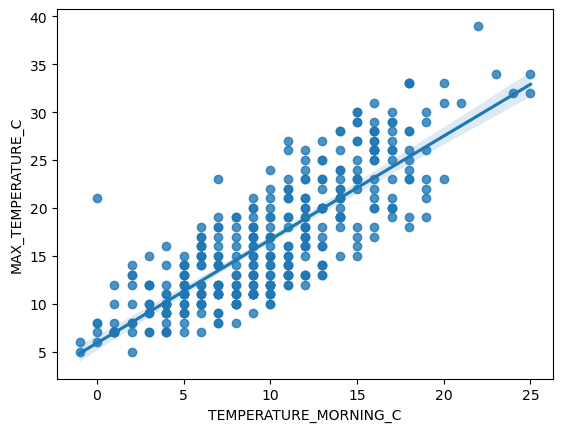

In [53]:
# Display a regplot with a positive correlation:

sns.regplot(x='TEMPERATURE_MORNING_C', y='MAX_TEMPERATURE_C', data=df)

plt.show()


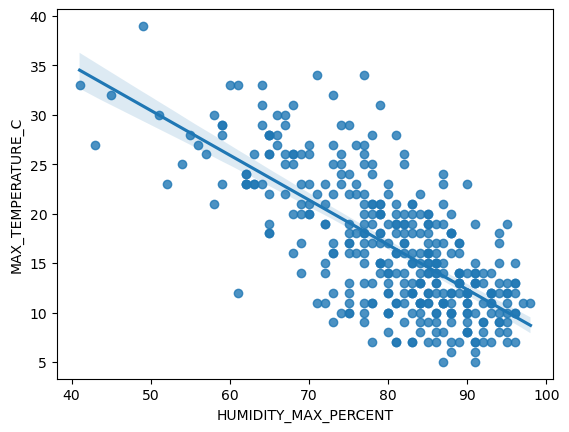

In [54]:
# Display a regplot with a negative correlation:

sns.regplot(x='HUMIDITY_MAX_PERCENT', y='MAX_TEMPERATURE_C', data=df)

plt.show()


# Multiple plots

Draw 4 different charts of your choice on the same dashboard. You're an analyst, you have to be force of proposal. Your goal here is to represent which season has the best weather.

Remember, a MatPlotLib "figure" is like a dashboard including subplots. So you have to create a MatPlotLib figure with subplots. And these subplots will be Seaborn's charts.

In [ ]:
# Your code here
# Your code here



# Types de Plots Seaborn

https://seaborn.pydata.org/tutorial/function_overview.html 


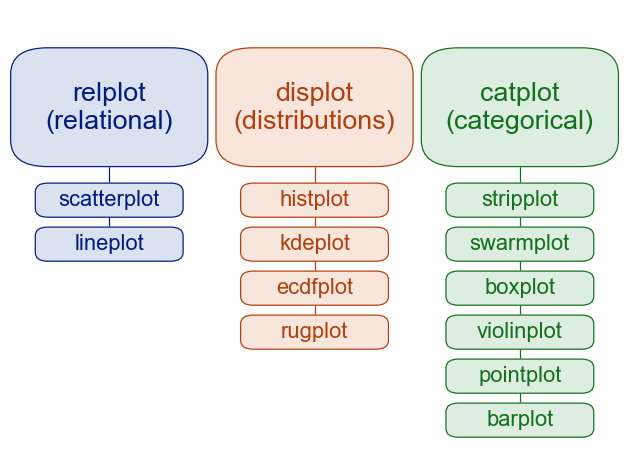

# 2 types de plots importants ne figurent pas dans ces catégories

## Pair Plots
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot. But it's slow to compute on the whole dataset.

- Creates a slice of 10 columns (including the "OPINION" column)
- Creates a sample of this slice
- Draw a Pairplot on this sample, and colorize it by `OPINION`

In [ ]:
# It's your turn:



## Joint plots

In [ ]:
sns.jointplot(data=df, x="CLOUDCOVER_AVG_PERCENT", y="MAX_TEMPERATURE_C", hue="OPINION")

### Modifier des graphiques

In [ ]:
# Sans les objets ax

plt.xticks(ticks, labels)
plt.xlabel('')                             
plt.ylabel('')
plt.title('')
plt.legend()

In [ ]:
# Avec les objets ax

ax.set_xticks()
ax.set_xticklabels()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.legend()